# Capstone project 1: House prices advanced regression

## Machine Learning - Xgboost Model

In [27]:
import pandas as pd
import numpy as np

import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline


In [28]:
# Load training and testing data
y_scaler = float(open('y_scale_factor.txt','r').read())
X = pd.read_csv('./data/train_scale.csv',index_col=0)
y = pd.read_csv('./data/train.csv',index_col=0)['SalePrice']*y_scaler

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=8)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 318), (438, 318), (1022,), (438,))

### Fine Tuning Models

In [31]:
params = [] # to store all best training and testing score
scores = [] # store the best accuracy
experiment = [] # store the parameter name that is going to experiment

In [32]:
# investigate parameter n_estimator
test_score = []
train_score = []

step=50
name = 'n_estimators'
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15000000000000002,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
             n_estimators=step*n, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.8500000000000001, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))

In [33]:

def plot_accuracy(train_score,test_score,step):# Plot model accuracy

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,2,1)
    plt.plot(np.arange(1,10)*step, train_score)
    plt.ylabel('r2 of training')
    plt.xlabel('Training')
    ax = fig.add_subplot(1,2,2)
    plt.plot(np.arange(1,10)*step, test_score)
    plt.xlabel('Testing')

Text(0.5, 1.0, 'n_estimators')

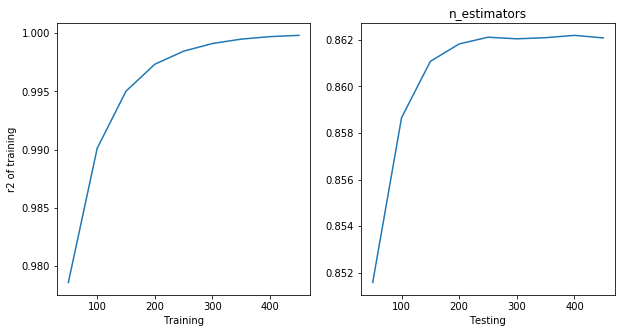

In [34]:

plot_accuracy(train_score,test_score,step) # 350 would be sufficient
plt.title(name)

In [35]:
best_train_param = train_score.index(max(train_score))*step
best_train_score = max(train_score)
best_test_param = test_score.index(max(test_score))*step
best_test_score = max(test_score)

In [36]:
params.append((best_train_param,best_test_param))
scores.append((best_train_score,best_test_score))
experiment.append(name)

In [37]:
# Learning_rate:
step = 0.02
test_score = []
train_score = []
name = 'Learning Rate'
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=step*n,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.8500000000000001, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))

Text(0.5, 1.0, 'Learning Rate')

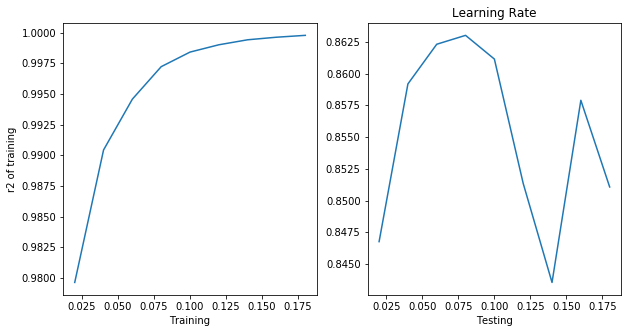

In [38]:
plot_accuracy(train_score,test_score,step) # 0.2 would best
plt.title(name)


In [39]:
best_train_param = train_score.index(max(train_score))*step
best_train_score = max(train_score)
best_test_param = test_score.index(max(test_score))*step
best_test_score = max(test_score)
params.append((best_train_param,best_test_param))
scores.append((best_train_score,best_test_score))
experiment.append(name)

In [40]:
# max_depth
step=1
test_score = []
train_score = []
name = 'max_depth'
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=n, min_child_weight=1, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.8500000000000001, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))

Text(0.5, 1.0, 'max_depth')

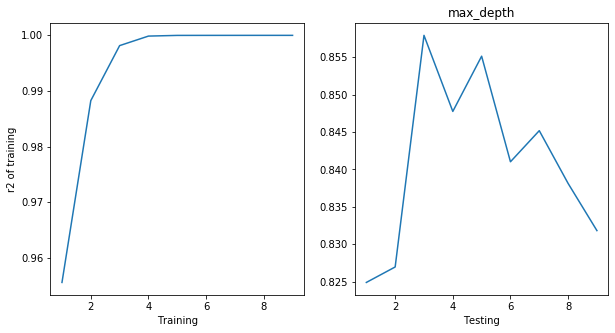

In [41]:
plot_accuracy(train_score,test_score,step) # 3 would be good
plt.title(name)

In [42]:
best_train_param = train_score.index(max(train_score))*step
best_train_score = max(train_score)
best_test_param = test_score.index(max(test_score))*step
best_test_score = max(test_score)
params.append((best_train_param,best_test_param))
scores.append((best_train_score,best_test_score))
experiment.append(name)

In [43]:
# subsample
step = 0.08
test_score = []
train_score = []
name = 'subsample'
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=step*n, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))

Text(0.5, 1.0, 'subsample')

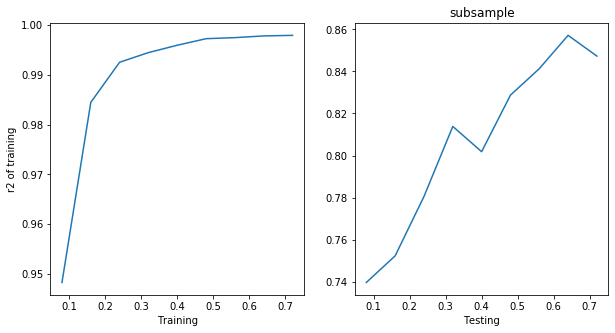

In [44]:
plot_accuracy(train_score,test_score,step) # 0.65 would be good
plt.title(name)

In [45]:
best_train_param = train_score.index(max(train_score))*step
best_train_score = max(train_score)
best_test_param = test_score.index(max(test_score))*step
best_test_score = max(test_score)
params.append((best_train_param,best_test_param))
scores.append((best_train_score,best_test_score))
experiment.append(name)

In [46]:
# colsample_bytree
step=0.1
test_score = []
train_score = []
name = 'colsample_bytree'
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=n*step, gamma=0,
             importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.65, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))

Text(0.5, 1.0, 'colsample_bytree')

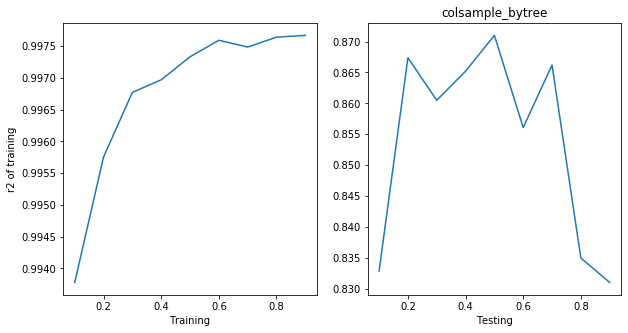

In [47]:
plot_accuracy(train_score,test_score,step) # 0.45 would be good
plt.title(name)

In [48]:
best_train_param = train_score.index(max(train_score))*step
best_train_score = max(train_score)
best_test_param = test_score.index(max(test_score))*step
best_test_score = max(test_score)
params.append((best_train_param,best_test_param))
scores.append((best_train_score,best_test_score))
experiment.append(name)

In [49]:
# min_child_weight
name = 'min_child_weight'
test_score = []
train_score = []
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.45, gamma=0,
             importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=3, min_child_weight=n, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.65, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))

Text(0.5, 1.0, 'min_child_weight')

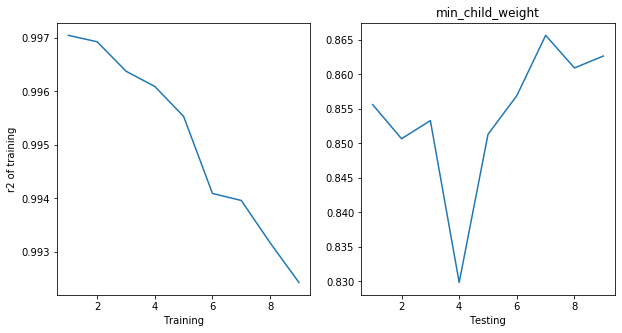

In [50]:
plot_accuracy(train_score,test_score,1) # 7 would be good
plt.title(name)

In [53]:
best_train_param = train_score.index(max(train_score))*step
best_train_score = max(train_score)
best_test_param = test_score.index(max(test_score))*step
best_test_score = max(test_score)
params.append((best_train_param,best_test_param))
scores.append((best_train_score,best_test_score))
experiment.append(name)

In [67]:
experiment_doc = pd.DataFrame(list(zip(experiment,params,scores)),\
                              columns=['parameter_name','best_parameter(train,test)','best_score(train,test)'])
experiment_doc.to_csv('experiments_doc.csv')


In [68]:
experiment_doc

,parameter_name,"best_parameter(train,test)","best_score(train,test)"
0,n_estimators,"(400, 350)","(0.999807244639819, 0.8621939187139758)"
1,Learning Rate,"(0.16, 0.06)","(0.9997778081287881, 0.8630069628715896)"
2,max_depth,"(7, 2)","(0.999982526524428, 0.8579016329547222)"
3,subsample,"(0.64, 0.56)","(0.9979672879949777, 0.8571673758577336)"
4,colsample_bytree,"(0.8, 0.4)","(0.997669999620488, 0.8710150491582573)"
5,min_child_weight,"(0.0, 0.2)","(0.9970036828809768, 0.8691081680526537)"


## Found the best model

In [69]:
# save model
print('best_score:{}'.format(experiment_doc.iloc[4]['best_score(train,test)'][1]))


best_score:0.8710150491582573


In [70]:
# Best model for testing accuracy:
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.65, verbosity=1)
model.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=350,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.65, verbosity=1)

In [71]:
pickle.dump(model, open("./models/best_xgb_model.dat", "wb"))

In [58]:

# Additiona search
search_grid = {
    'colsample_bynode':np.arange(0.05,1,0.05),
    'colsample_bylevel':np.arange(0.05,1,0.05),
    'reg_lambda':np.arange(0,1,0.05),
    'reg_alpha':np.arange(0,1,0.05),
}
model = xgb.XGBRegressor(base_score=0.3, booster='gbtree',
             colsample_bytree=0.45, gamma=0,
             importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=3, min_child_weight=n, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0,
             scale_pos_weight=1, seed=None, silent=None,
             subsample=0.65, verbosity=1)

random_search = RandomizedSearchCV(estimator=model,
                                      param_distributions=search_grid,
                                      scoring= 'r2',
                                      cv=4,
                                      n_iter=10,
                                      verbose=1)
random_search.fit(X_train,y_train)
print('Best score: ', random_search.best_score_)
print('Bset model: ', random_search.best_estimator_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   20.0s finished


Best score:  0.8798670202078218
Bset model:  XGBRegressor(base_score=0.3, booster='gbtree',
             colsample_bylevel=0.9500000000000001, colsample_bynode=0.3,
             colsample_bytree=0.45, gamma=0, importance_type='gain',
             learning_rate=0.2, max_delta_step=0, max_depth=3,
             min_child_weight=9, missing=None, n_estimators=350, n_jobs=1,
             nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.55, reg_lambda=0.35000000000000003, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.65, verbosity=1)


In [72]:
#Verify modeling fitting using test data

y_test_predict = random_search.best_estimator_.predict(X_test)
r2 = r2_score(y_test,y_test_predict)

print('r2:{}'.format(r2))


r2:0.8288487145528731
